# Lecture 9 Notes

### Load imports

In [3]:
from sklearn import datasets

In [4]:
#load digits data set
digits = datasets.load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

In [5]:
len(digits.data)
len(digits.target)


1797

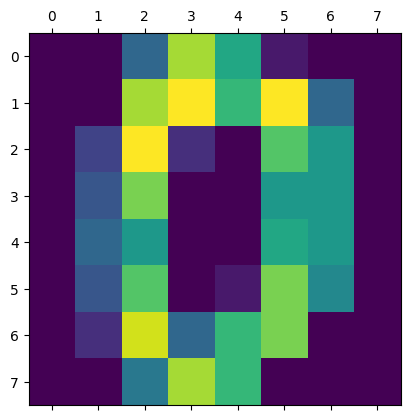

In [6]:
#visualise the first input
import matplotlib.pyplot as plt

plt.matshow(digits.images[0])

In [7]:
# prepare the data
X = digits.data
y= digits.target 

y
len(X[0])
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
#split training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [10]:
# create the model and perform grid search
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [11]:
# inspect th outcome of grid search
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [12]:
best_model = SVC(C=10, gamma='scale', kernel='rbf')

best_model.fit(X_train, y_train)

SVC(C=10)

In [13]:
y_pred = best_model.predict(X_test)

len(y_pred)

360

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [15]:
results = grid_search.cv_results_

results['mean_train_score']
train_scores = results['mean_test_score']
test_scores = results['mean_test_score']
param_list = results['params']

for train_score, test_score, params in zip(train_scores, test_scores, param_list):
    print(params)
    print(train_score)
    print(test_score)
    print()

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.9707680023228804
0.9707680023228804

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.9478126209833526
0.9478126209833526

{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.9707680023228804
0.9707680023228804

{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.10716705381339528
0.10716705381339528

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.9707680023228804
0.9707680023228804

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.9860820751064654
0.9860820751064654

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.9707680023228804
0.9707680023228804

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.44610191637630664
0.44610191637630664

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.9707680023228804
0.9707680023228804

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.9916545683313978
0.9916545683313978

{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.9707680023228804
0.9707680023228804

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.4975851722802

# Activity 

In [16]:
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

